In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d755a1ede82d8c6d8fbbafc342987ae"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d755a1ede82d8c6d8fbbafc342987ae


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 13 | christchurch
Processing Record 2 of Set 13 | okato
Processing Record 3 of Set 13 | mataura
Processing Record 4 of Set 13 | grand gaube
Processing Record 5 of Set 13 | clyde river
Processing Record 6 of Set 13 | jiazi
Processing Record 7 of Set 13 | kanlagay
Processing Record 8 of Set 13 | busselton
Processing Record 9 of Set 13 | hobart
Processing Record 10 of Set 13 | choctaw
Processing Record 11 of Set 13 | mahebourg
Processing Record 12 of Set 13 | tuktoyaktuk
Processing Record 13 of Set 13 | goundam
Processing Record 14 of Set 13 | mar del plata
Processing Record 15 of Set 13 | east london
Processing Record 16 of Set 13 | hilo
Processing Record 17 of Set 13 | samusu
City not found. Skipping...
Processing Record 18 of Set 13 | alice springs
Processing Record 19 of Set 13 | ailigandi
Processing Record 20 of Set 13 | saint-francois
Processing Record 21 of Set 13 | rikitea
Processing Record 22 of Set 13 | cape town
Processing Record 23 of Set 13 | illoqq

Processing Record 40 of Set 16 | aripuana
Processing Record 41 of Set 16 | meulaboh
Processing Record 42 of Set 16 | gombong
Processing Record 43 of Set 16 | biak
Processing Record 44 of Set 16 | webb city
Processing Record 45 of Set 16 | oranjemund
Processing Record 46 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 16 | ketchikan
Processing Record 48 of Set 16 | oshakati
Processing Record 49 of Set 16 | manokwari
Processing Record 50 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 17 | la asuncion
Processing Record 2 of Set 17 | amahai
Processing Record 3 of Set 17 | tuggurt
City not found. Skipping...
Processing Record 4 of Set 17 | coahuayana
Processing Record 5 of Set 17 | sayat
Processing Record 6 of Set 17 | road town
Processing Record 7 of Set 17 | pisco
Processing Record 8 of Set 17 | sola
Processing Record 9 of Set 17 | ciudad bolivar
Processing Record 10 of Set 17 | barentsburg
City not found. Skipping...
Process

Processing Record 25 of Set 20 | tomatlan
Processing Record 26 of Set 20 | bend
Processing Record 27 of Set 20 | antalya
Processing Record 28 of Set 20 | malangali
Processing Record 29 of Set 20 | ambilobe
Processing Record 30 of Set 20 | emerald
Processing Record 31 of Set 20 | oshogbo
Processing Record 32 of Set 20 | luena
Processing Record 33 of Set 20 | kerema
Processing Record 34 of Set 20 | strezhevoy
Processing Record 35 of Set 20 | santa ana
Processing Record 36 of Set 20 | tessalit
Processing Record 37 of Set 20 | port hardy
Processing Record 38 of Set 20 | itarema
Processing Record 39 of Set 20 | port hedland
Processing Record 40 of Set 20 | saint anthony
Processing Record 41 of Set 20 | constitucion
Processing Record 42 of Set 20 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 20 | kharp
Processing Record 44 of Set 20 | los llanos de aridane
Processing Record 45 of Set 20 | tuatapere
Processing Record 46 of Set 20 | fuxin
Processing Record 47 of Set 2

Processing Record 13 of Set 24 | hualmay
Processing Record 14 of Set 24 | samalaeulu
City not found. Skipping...
Processing Record 15 of Set 24 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 24 | nikolsk
Processing Record 17 of Set 24 | kachiry
Processing Record 18 of Set 24 | xining
Processing Record 19 of Set 24 | koboldo
City not found. Skipping...
Processing Record 20 of Set 24 | cape coast
Processing Record 21 of Set 24 | havre-saint-pierre
Processing Record 22 of Set 24 | takhtamygda
Processing Record 23 of Set 24 | medvedka
Processing Record 24 of Set 24 | preobrazhenka
Processing Record 25 of Set 24 | ipixuna
Processing Record 26 of Set 24 | rioja
Processing Record 27 of Set 24 | la palma
Processing Record 28 of Set 24 | kidal
Processing Record 29 of Set 24 | marandahalli
Processing Record 30 of Set 24 | princeville
Processing Record 31 of Set 24 | siderno
Processing Record 32 of Set 24 | kawana waters
City not found. Skipping...
Processing Record 33 of S

In [12]:
# Print the city count to confirm sufficient count.
len(cities)

606

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Christchurch,-43.53,172.63,51.01,93,23,2.24,NZ,2020-10-24 14:05:11
1,Okato,-39.20,173.88,55.00,95,15,1.99,NZ,2020-10-24 14:08:18
2,Mataura,-46.19,168.86,63.00,56,100,13.00,NZ,2020-10-24 14:04:16
3,Grand Gaube,-20.01,57.66,75.00,66,32,7.00,MU,2020-10-24 14:08:18
4,Clyde River,70.47,-68.59,15.80,85,90,4.70,CA,2020-10-24 14:05:16
5,Jiazi,22.88,116.07,70.63,62,100,22.53,CN,2020-10-24 14:08:18
6,Kanlagay,5.88,121.29,78.35,86,100,11.70,PH,2020-10-24 14:08:18
7,Busselton,-33.65,115.33,63.00,38,50,12.73,AU,2020-10-24 14:08:18
8,Hobart,-42.88,147.33,44.60,56,2,12.75,AU,2020-10-24 14:06:07
9,Choctaw,35.50,-97.27,39.99,69,90,8.05,US,2020-10-24 14:08:19


In [14]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city_data_df the new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Christchurch,NZ,2020-10-24 14:05:11,-43.53,172.63,51.01,93,23,2.24
1,Okato,NZ,2020-10-24 14:08:18,-39.20,173.88,55.00,95,15,1.99
2,Mataura,NZ,2020-10-24 14:04:16,-46.19,168.86,63.00,56,100,13.00
3,Grand Gaube,MU,2020-10-24 14:08:18,-20.01,57.66,75.00,66,32,7.00
4,Clyde River,CA,2020-10-24 14:05:16,70.47,-68.59,15.80,85,90,4.70
5,Jiazi,CN,2020-10-24 14:08:18,22.88,116.07,70.63,62,100,22.53
6,Kanlagay,PH,2020-10-24 14:08:18,5.88,121.29,78.35,86,100,11.70
7,Busselton,AU,2020-10-24 14:08:18,-33.65,115.33,63.00,38,50,12.73
8,Hobart,AU,2020-10-24 14:06:07,-42.88,147.33,44.60,56,2,12.75
9,Choctaw,US,2020-10-24 14:08:19,35.50,-97.27,39.99,69,90,8.05


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

# Get today's date in seconds 
# time.time() output = time in sec since 1/1/1970 as floating point decimal)
# strftime("%x") converts the output to a date
today = time.strftime("%x")
today

'10/24/20'

In [18]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

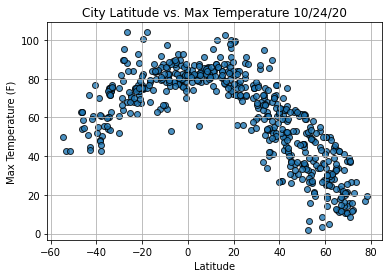

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

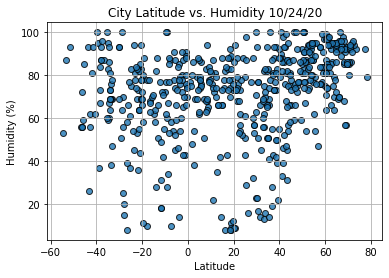

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

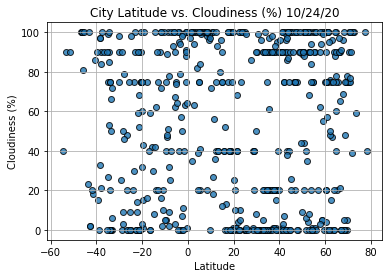

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

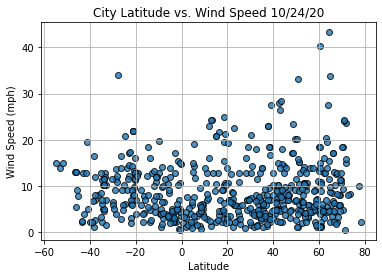

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()